### Importaçãode bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Definição de Função

In [3]:
def show_decision_region(x, y, clf, f0, f1):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel(f0)
    plt.ylabel(f1)
    if clf.__class__.__name__ == "KNeighborsClassifier":
        plt.title(clf.__class__.__name__ + " k = " + str(clf.n_neighbors))
    else:
        plt.title(clf.__class__.__name__)
    plt.show()

### Carregamento de dataset e pré-processamento

In [19]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [38]:
#attributes = data.iloc[:, 0:11].values
#quality = data.iloc[:, 11].values
attributes = data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]]
quality = data[["quality"]]

In [46]:
quality["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [33]:
# definição de classes e features
class_a = 5
class_b = 6
feature_0 = "alcohol"
feature_1 = "chlorides"

# filtrar classes e features
class_0_instances = (attributes == class_a)
class_1_instances = (attributes == class_b)

filtered_y = quality[class_0_instances | class_1_instances]
filtered_X = attributes[class_0_instances | class_1_instances]
filtered_X = filtered_X[[feature_0, feature_1]]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(filtered_X, filtered_y, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(attributes, quality, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [31]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.26      0.26      0.26        19
           5       0.66      0.61      0.64       219
           6       0.62      0.63      0.63       275
           7       0.58      0.66      0.62       113
           8       0.30      0.29      0.29        21
           9       0.00      0.00      0.00         2

    accuracy                           0.60       650
   macro avg       0.35      0.35      0.35       650
weighted avg       0.61      0.60      0.60       650



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
show_decision_region(
    np.array(
        [
            X_test[feature_0].values, 
            X_test[feature_1].values,
        ]
    ).T, 
    y_test.values, 
    model, 
    feature_0, 
    feature_1
)

ValueError: y must be a 1D array. Found (650, 1)

[Text(0.474096818547505, 0.9807692307692307, 'X[10] <= 10.117\ngini = 0.672\nsamples = 5262\nvalue = [25, 179, 1718, 2304, 876, 157, 3]'),
 Text(0.2123097741612361, 0.9423076923076923, 'X[1] <= 0.287\ngini = 0.59\nsamples = 2428\nvalue = [13, 96, 1230, 936, 133, 20, 0]'),
 Text(0.10069736281575978, 0.9038461538461539, 'X[1] <= 0.237\ngini = 0.611\nsamples = 1095\nvalue = [5, 23, 388, 550, 111, 18, 0]'),
 Text(0.04448197549911345, 0.8653846153846154, 'X[0] <= 6.85\ngini = 0.609\nsamples = 592\nvalue = [3, 11, 151, 327, 83, 17, 0]'),
 Text(0.027563497363391438, 0.8269230769230769, 'X[8] <= 3.245\ngini = 0.506\nsamples = 273\nvalue = [1, 3, 74, 176, 19, 0, 0]'),
 Text(0.017178253160476203, 0.7884615384615384, 'X[3] <= 15.5\ngini = 0.423\nsamples = 162\nvalue = [1, 2, 34, 118, 7, 0, 0]'),
 Text(0.016441384392198402, 0.75, 'X[2] <= 0.455\ngini = 0.488\nsamples = 131\nvalue = [1, 2, 34, 87, 7, 0, 0]'),
 Text(0.00764501347088217, 0.7115384615384616, 'X[2] <= 0.245\ngini = 0.432\nsamples = 102

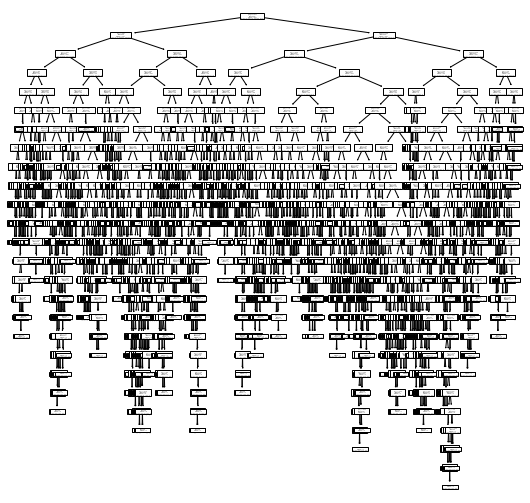

In [18]:
plt.figure(figsize=(9,9))
plot_tree(model)